In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
def load_data():
    data = pd.read_csv('/content/drive/Shared drives/Dataset/stroke.csv', delimiter=';')
    pd.set_option('display.max_colwidth', None)
    return data

data = load_data()
data


,Umur,Jenis Kelamin,Hipertensi,Penyakit Jantung,Average Glucose Level,BMI,Status Merokok,Konsumsi Alkohol,Aktivitas Fisik,Riwayat Resiko Tinggi,Riwayat Resiko Tinggi Keluarga,Diagnosis
0,56,Laki-Laki,0,1,130.91,22.37,Tidak Merokok,Jarang,Sedang,0,1,Resiko Tinggi
1,80,Laki-Laki,0,0,183.73,32.57,Tidak Merokok,Tidak Pernah,Rendah,0,0,Resiko Tinggi
2,26,Laki-Laki,1,1,189.00,20.32,Sebelumnya Merokok,Jarang Sekali,Tinggi,0,1,Resiko Tinggi
3,73,Laki-Laki,0,0,185.29,27.50,Tidak Merokok,Sering,Sedang,0,0,Resiko Rendah
4,51,Laki-Laki,1,1,177.34,29.06,Sedang Merokok,Jarang Sekali,Rendah,0,1,Resiko Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,88,Perempuan,1,1,160.22,39.73,Sedang Merokok,Jarang,Tinggi,0,0,Resiko Rendah
14996,47,Perempuan,0,0,107.58,22.17,Tidak Merokok,Tidak Pernah,Rendah,1,0,Resiko Rendah
14997,35,Laki-Laki,0,0,134.90,26.38,Tidak Merokok,Jarang Sekali,Tinggi,1,0,Resiko Tinggi
14998,73,Laki-Laki,0,0,169.42,28.32,Tidak Merokok,Tidak Pernah,Tinggi,0,1,Resiko Rendah


In [4]:
data['Diabetes'] = np.where(data['Average Glucose Level'] >= 126, 1, 0)
data = data.drop('Average Glucose Level', axis=1)
data.insert(4, 'Diabetes', data.pop('Diabetes'))
data

,Umur,Jenis Kelamin,Hipertensi,Penyakit Jantung,Diabetes,BMI,Status Merokok,Konsumsi Alkohol,Aktivitas Fisik,Riwayat Resiko Tinggi,Riwayat Resiko Tinggi Keluarga,Diagnosis
0,56,Laki-Laki,0,1,1,22.37,Tidak Merokok,Jarang,Sedang,0,1,Resiko Tinggi
1,80,Laki-Laki,0,0,1,32.57,Tidak Merokok,Tidak Pernah,Rendah,0,0,Resiko Tinggi
2,26,Laki-Laki,1,1,1,20.32,Sebelumnya Merokok,Jarang Sekali,Tinggi,0,1,Resiko Tinggi
3,73,Laki-Laki,0,0,1,27.50,Tidak Merokok,Sering,Sedang,0,0,Resiko Rendah
4,51,Laki-Laki,1,1,1,29.06,Sedang Merokok,Jarang Sekali,Rendah,0,1,Resiko Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,88,Perempuan,1,1,1,39.73,Sedang Merokok,Jarang,Tinggi,0,0,Resiko Rendah
14996,47,Perempuan,0,0,0,22.17,Tidak Merokok,Tidak Pernah,Rendah,1,0,Resiko Rendah
14997,35,Laki-Laki,0,0,1,26.38,Tidak Merokok,Jarang Sekali,Tinggi,1,0,Resiko Tinggi
14998,73,Laki-Laki,0,0,1,28.32,Tidak Merokok,Tidak Pernah,Tinggi,0,1,Resiko Rendah


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Umur                            15000 non-null  int64  
 1   Jenis Kelamin                   15000 non-null  object 
 2   Hipertensi                      15000 non-null  int64  
 3   Penyakit Jantung                15000 non-null  int64  
 4   Diabetes                        15000 non-null  int64  
 5   BMI                             15000 non-null  float64
 6   Status Merokok                  15000 non-null  object 
 7   Konsumsi Alkohol                15000 non-null  object 
 8   Aktivitas Fisik                 15000 non-null  object 
 9   Riwayat Resiko Tinggi           15000 non-null  int64  
 10  Riwayat Resiko Tinggi Keluarga  15000 non-null  int64  
 11  Diagnosis                       15000 non-null  object 
dtypes: float64(1), int64(6), object(

In [6]:
categorical = data.select_dtypes(exclude='number')
categorical

,Jenis Kelamin,Status Merokok,Konsumsi Alkohol,Aktivitas Fisik,Diagnosis
0,Laki-Laki,Tidak Merokok,Jarang,Sedang,Resiko Tinggi
1,Laki-Laki,Tidak Merokok,Tidak Pernah,Rendah,Resiko Tinggi
2,Laki-Laki,Sebelumnya Merokok,Jarang Sekali,Tinggi,Resiko Tinggi
3,Laki-Laki,Tidak Merokok,Sering,Sedang,Resiko Rendah
4,Laki-Laki,Sedang Merokok,Jarang Sekali,Rendah,Resiko Tinggi
...,...,...,...,...,...
14995,Perempuan,Sedang Merokok,Jarang,Tinggi,Resiko Rendah
14996,Perempuan,Tidak Merokok,Tidak Pernah,Rendah,Resiko Rendah
14997,Laki-Laki,Tidak Merokok,Jarang Sekali,Tinggi,Resiko Tinggi
14998,Laki-Laki,Tidak Merokok,Tidak Pernah,Tinggi,Resiko Rendah


In [7]:
labelencoder = LabelEncoder()

for column in categorical:
    numericColumn = labelencoder.fit_transform(categorical[column])
    data[column] = numericColumn
data

,Umur,Jenis Kelamin,Hipertensi,Penyakit Jantung,Diabetes,BMI,Status Merokok,Konsumsi Alkohol,Aktivitas Fisik,Riwayat Resiko Tinggi,Riwayat Resiko Tinggi Keluarga,Diagnosis
0,56,0,0,1,1,22.37,2,0,1,0,1,1
1,80,0,0,0,1,32.57,2,3,0,0,0,1
2,26,0,1,1,1,20.32,0,1,2,0,1,1
3,73,0,0,0,1,27.50,2,2,1,0,0,0
4,51,0,1,1,1,29.06,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,88,1,1,1,1,39.73,1,0,2,0,0,0
14996,47,1,0,0,0,22.17,2,3,0,1,0,0
14997,35,0,0,0,1,26.38,2,1,2,1,0,1
14998,73,0,0,0,1,28.32,2,3,2,0,1,0


In [8]:
x = data.drop(['Diagnosis'], axis='columns')
standardscaler = StandardScaler()
x_scale = standardscaler.fit_transform(x)
x_scale = pd.DataFrame(x_scale, columns=x.columns)

In [9]:
x = x_scale
y = data['Diagnosis']

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Umur                            15000 non-null  float64
 1   Jenis Kelamin                   15000 non-null  float64
 2   Hipertensi                      15000 non-null  float64
 3   Penyakit Jantung                15000 non-null  float64
 4   Diabetes                        15000 non-null  float64
 5   BMI                             15000 non-null  float64
 6   Status Merokok                  15000 non-null  float64
 7   Konsumsi Alkohol                15000 non-null  float64
 8   Aktivitas Fisik                 15000 non-null  float64
 9   Riwayat Resiko Tinggi           15000 non-null  float64
 10  Riwayat Resiko Tinggi Keluarga  15000 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [11]:
x

,Umur,Jenis Kelamin,Hipertensi,Penyakit Jantung,Diabetes,BMI,Status Merokok,Konsumsi Alkohol,Aktivitas Fisik,Riwayat Resiko Tinggi,Riwayat Resiko Tinggi Keluarga
0,0.093263,-0.983864,-0.575811,0.994150,0.960512,-0.705993,1.223053,-1.338625,-0.009634,-1.000533,0.987808
1,1.232733,-0.983864,-0.575811,-1.005884,0.960512,0.704803,1.223053,1.348418,-1.234313,-1.000533,-1.012343
2,-1.331076,-0.983864,1.736682,0.994150,0.960512,-0.989536,-1.227792,-0.442944,1.215045,-1.000533,0.987808
3,0.900388,-0.983864,-0.575811,-1.005884,0.960512,0.003554,1.223053,0.452737,-0.009634,-1.000533,-1.012343
4,-0.144127,-0.983864,1.736682,0.994150,0.960512,0.219323,-0.002369,-0.442944,-1.234313,-1.000533,0.987808
...,...,...,...,...,...,...,...,...,...,...,...
14995,1.612557,1.016401,1.736682,0.994150,0.960512,1.695127,-0.002369,-1.338625,1.215045,-1.000533,-1.012343
14996,-0.334039,1.016401,-0.575811,-1.005884,-1.041111,-0.733656,1.223053,1.348418,-1.234313,0.999467,-1.012343
14997,-0.903774,-0.983864,-0.575811,-1.005884,0.960512,-0.151357,1.223053,-0.442944,1.215045,0.999467,-1.012343
14998,0.900388,-0.983864,-0.575811,-1.005884,0.960512,0.116971,1.223053,1.348418,1.215045,-1.000533,0.987808


In [12]:
y

0        1
1        1
2        1
3        0
4        1
        ..
14995    0
14996    0
14997    1
14998    0
14999    1
Name: Diagnosis, Length: 15000, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

print('Training dataset:\n', x_train.shape, y_train.shape)
print('Test dataset:\n', x_test.shape, y_test.shape)

Training dataset:
 (10500, 11) (10500,)
Test dataset:
 (4500, 11) (4500,)


In [32]:
# Mengonversi data yang telah diubah skala kembali ke data asli
x_restored = standardscaler.inverse_transform(x_train)
restored_data = pd.DataFrame(data=x_restored, columns=x_train.columns)

restored_data['Diagnosis'] = labelencoder.inverse_transform(y_train.astype(int))

restored_data


,Umur,Jenis Kelamin,Hipertensi,Penyakit Jantung,Diabetes,BMI,Status Merokok,Konsumsi Alkohol,Aktivitas Fisik,Riwayat Resiko Tinggi,Riwayat Resiko Tinggi Keluarga,Diagnosis
0,43.0,1.0,1.000000e+00,1.0,1.0,17.10,2.0,1.0,2.0,0.0,0.0,Resiko Rendah
1,30.0,1.0,2.775558e-17,1.0,0.0,37.95,2.0,0.0,1.0,1.0,1.0,Resiko Tinggi
2,39.0,0.0,2.775558e-17,0.0,1.0,32.72,0.0,1.0,2.0,1.0,0.0,Resiko Tinggi
3,18.0,1.0,2.775558e-17,0.0,1.0,26.42,0.0,1.0,1.0,0.0,1.0,Resiko Rendah
4,50.0,1.0,2.775558e-17,0.0,1.0,39.56,0.0,1.0,2.0,1.0,1.0,Resiko Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...
10495,22.0,1.0,2.775558e-17,0.0,1.0,18.67,1.0,3.0,1.0,1.0,0.0,Resiko Rendah
10496,27.0,0.0,2.775558e-17,1.0,0.0,20.60,0.0,2.0,2.0,1.0,1.0,Resiko Tinggi
10497,76.0,1.0,2.775558e-17,1.0,0.0,36.56,0.0,2.0,2.0,1.0,1.0,Resiko Rendah
10498,79.0,0.0,1.000000e+00,0.0,1.0,23.55,0.0,2.0,0.0,1.0,0.0,Resiko Rendah


In [34]:
restored_data.to_csv

<bound method NDFrame.to_csv of        Umur  Jenis Kelamin    Hipertensi  Penyakit Jantung  Diabetes    BMI  \
0      43.0            1.0  1.000000e+00               1.0       1.0  17.10   
1      30.0            1.0  2.775558e-17               1.0       0.0  37.95   
2      39.0            0.0  2.775558e-17               0.0       1.0  32.72   
3      18.0            1.0  2.775558e-17               0.0       1.0  26.42   
4      50.0            1.0  2.775558e-17               0.0       1.0  39.56   
...     ...            ...           ...               ...       ...    ...   
10495  22.0            1.0  2.775558e-17               0.0       1.0  18.67   
10496  27.0            0.0  2.775558e-17               1.0       0.0  20.60   
10497  76.0            1.0  2.775558e-17               1.0       0.0  36.56   
10498  79.0            0.0  1.000000e+00               0.0       1.0  23.55   
10499  58.0            0.0  2.775558e-17               0.0       1.0  34.60   

       Status Merok

In [35]:
class SaveBestAccuracyModel(Callback):
    def __init__(self, filepath, monitor='acc', mode='max', save_best_only=True):
        super(SaveBestAccuracyModel, self).__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.mode = mode
        self.save_best_only = save_best_only
        self.best_accuracy = -float('inf') if mode == 'max' else float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get(self.monitor)
        if current_accuracy is None:
            print("SaveBestAccuracyModel warning: Accuracy metric '{}' not found. Model won't be saved.".format(self.monitor))
            return

        if (self.mode == 'max' and current_accuracy > self.best_accuracy) or \
           (self.mode == 'min' and current_accuracy < self.best_accuracy):

            print("\nSaveBestAccuracyModel: Accuracy improved from {:.4f} to {:.4f}. Saving model to {}"
                  .format(self.best_accuracy, current_accuracy, self.filepath))
            self.best_accuracy = current_accuracy
            self.model.save(self.filepath, overwrite=True)
        elif self.save_best_only and epoch > 0:
            print("\nSaveBestAccuracyModel: Accuracy did not improve from {:.4f}. Model not saved.".format(self.best_accuracy))

In [36]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               3

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#Membuat model dengan hasil terbaik
callbacks = [SaveBestAccuracyModel(filepath='Model_Klasifikasi.h5', monitor='accuracy', mode='max', save_best_only=True)]

history = model.fit(x_train, y_train, epochs=500, callbacks=[callbacks])

Epoch 1/500
328/329 [============================>.] - ETA: 0s - loss: 0.6952 - accuracy: 0.5009
SaveBestAccuracyModel: Accuracy improved from -inf to 0.5008. Saving model to Model_Klasifikasi.h5
329/329 [==============================] - 4s 6ms/step - loss: 0.6952 - accuracy: 0.5008
Epoch 2/500
 19/329 [>.............................] - ETA: 1s - loss: 0.6956 - accuracy: 0.4836

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/329 [============================>.] - ETA: 0s - loss: 0.6941 - accuracy: 0.5033
SaveBestAccuracyModel: Accuracy improved from 0.5008 to 0.5041. Saving model to Model_Klasifikasi.h5
329/329 [==============================] - 2s 6ms/step - loss: 0.6940 - accuracy: 0.5041
Epoch 3/500
329/329 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5057
SaveBestAccuracyModel: Accuracy improved from 0.5041 to 0.5057. Saving model to Model_Klasifikasi.h5
329/329 [==============================] - 2s 6ms/step - loss: 0.6934 - accuracy: 0.5057
Epoch 4/500
318/329 [===========================>..] - ETA: 0s - loss: 0.6926 - accuracy: 0.5152
SaveBestAccuracyModel: Accuracy improved from 0.5057 to 0.5153. Saving model to Model_Klasifikasi.h5
329/329 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5153
Epoch 5/500
327/329 [============================>.] - ETA: 0s - loss: 0.6925 - accuracy: 0.5184
SaveBestAccuracyModel: Accuracy improved from 0.5153 t

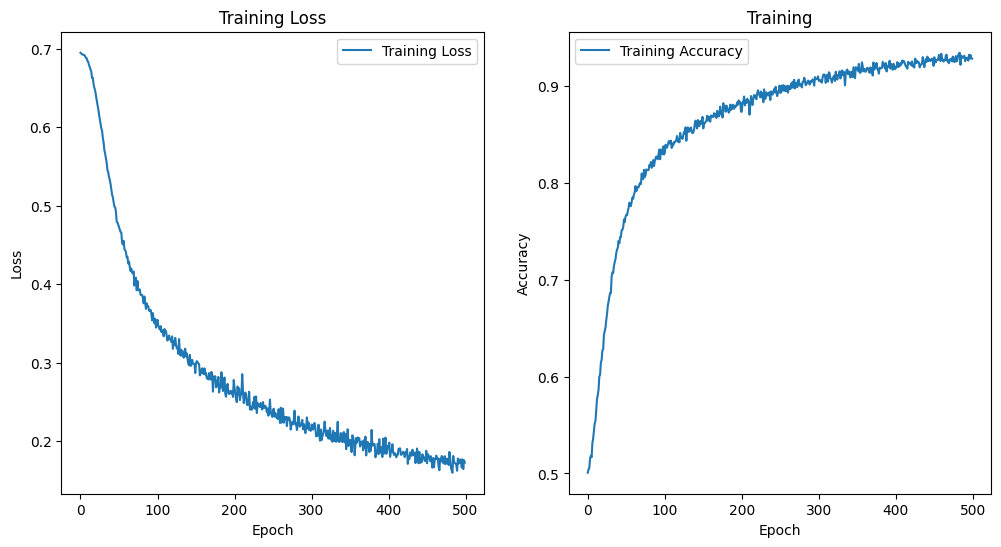

In [38]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Plot kurva loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot kurva metrik (misalnya accuracy)
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
sample_input = np.array([56,0,0,1,1,22.37,2,0,1,0,1]).reshape(1, -1)
scaledDataSample = standardscaler.fit_transform(sample_input)
Diagnosis = model.predict(scaledDataSample)
print("Diagnosis: ", int(np.round(Diagnosis)[0][0]))

1/1 [==============================] - 0s 277ms/step
Diagnosis:  0
